# Employee Access Challenge - Kaggle Competition

In [1]:
from pyforest import *
import warnings

warnings.simplefilter("ignore")

In [2]:
traindf = pd.read_csv('train.csv')

<IPython.core.display.Javascript object>

In [3]:
testdf = pd.read_csv('test.csv')

<IPython.core.display.Javascript object>

In [4]:
traindf.head()

,ACTION,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,39353,85475,117961,118300,123472,117905,117906,290919,117908
1,1,17183,1540,117961,118343,123125,118536,118536,308574,118539
2,1,36724,14457,118219,118220,117884,117879,267952,19721,117880
3,1,36135,5396,117961,118343,119993,118321,240983,290919,118322
4,1,42680,5905,117929,117930,119569,119323,123932,19793,119325


In [5]:
testdf.head()

,id,RESOURCE,MGR_ID,ROLE_ROLLUP_1,ROLE_ROLLUP_2,ROLE_DEPTNAME,ROLE_TITLE,ROLE_FAMILY_DESC,ROLE_FAMILY,ROLE_CODE
0,1,78766,72734,118079,118080,117878,117879,118177,19721,117880
1,2,40644,4378,117961,118327,118507,118863,122008,118398,118865
2,3,75443,2395,117961,118300,119488,118172,301534,249618,118175
3,4,43219,19986,117961,118225,118403,120773,136187,118960,120774
4,5,42093,50015,117961,118343,119598,118422,300136,118424,118425


In [6]:
print('traindf.shape',traindf.shape)
print('testdf.shape',testdf.shape)

traindf.shape (32769, 10)
testdf.shape (58921, 10)


In [7]:
traindf.apply(lambda x: len(x.unique()))

ACTION                 2
RESOURCE            7518
MGR_ID              4243
ROLE_ROLLUP_1        128
ROLE_ROLLUP_2        177
ROLE_DEPTNAME        449
ROLE_TITLE           343
ROLE_FAMILY_DESC    2358
ROLE_FAMILY           67
ROLE_CODE            343
dtype: int64

In [8]:
traindf['MGR_ID'].value_counts()

770      152
2270      99
2594      82
1350      71
2014      67
        ... 
1940       1
8087       1
22526      1
34948      1
58677      1
Name: MGR_ID, Length: 4243, dtype: int64

## Distribution of Features

### Distplot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

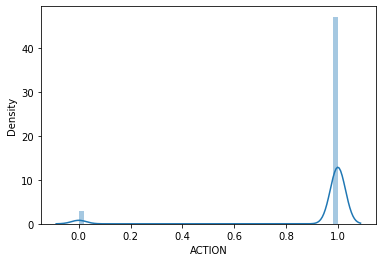

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

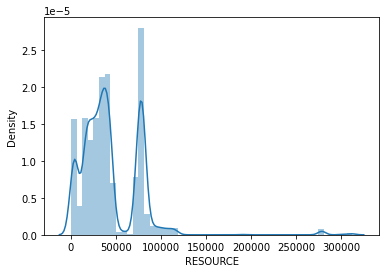

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

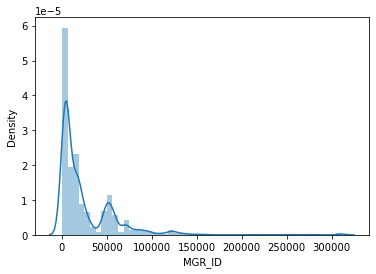

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

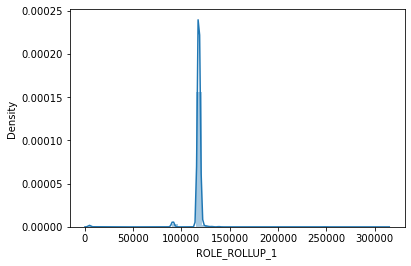

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

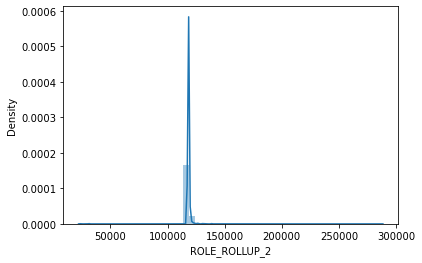

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

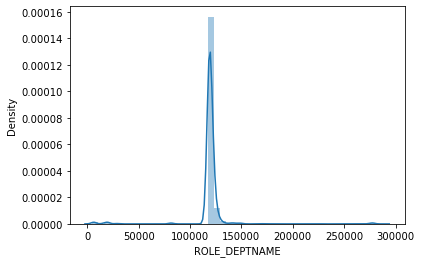

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

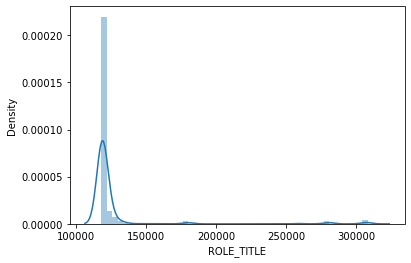

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

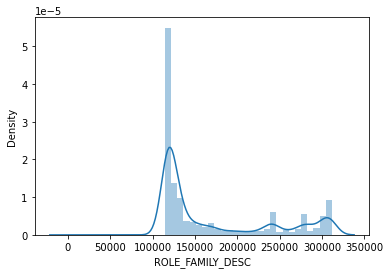

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

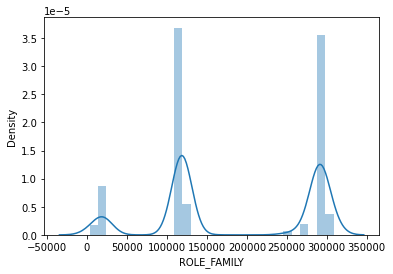

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

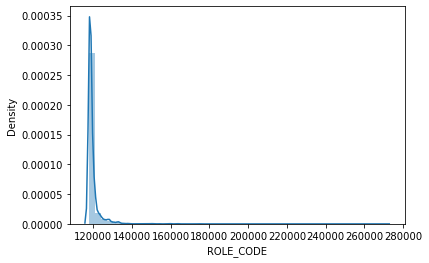

In [9]:
for i in traindf.describe().columns:
    sns.distplot(traindf[i].dropna())
    plt.show()

### Boxplot

In [10]:
traindf['ACTION'].value_counts()

1    30872
0     1897
Name: ACTION, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

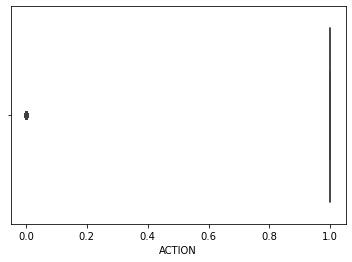

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

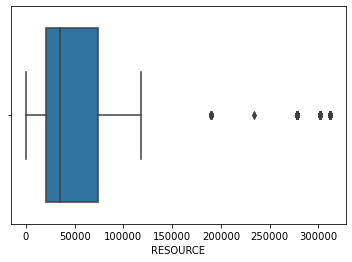

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

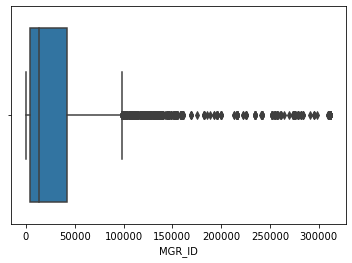

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

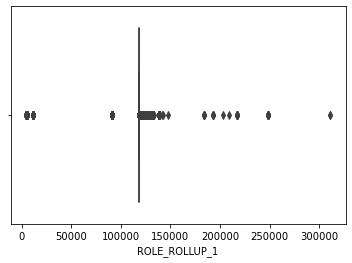

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

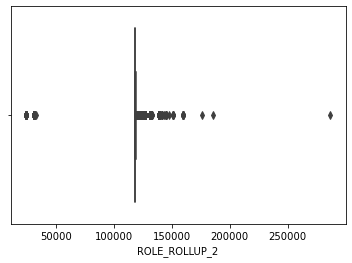

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

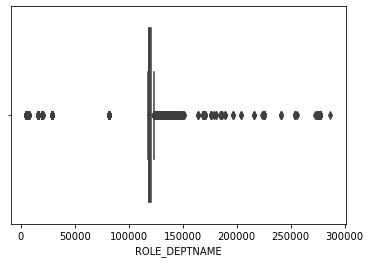

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

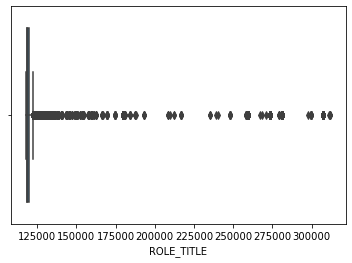

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

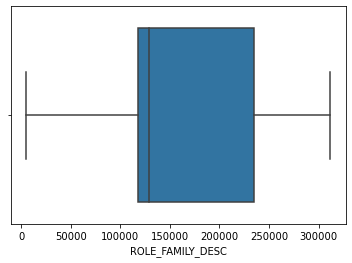

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

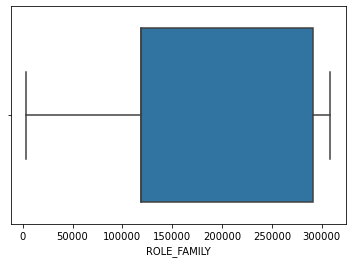

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

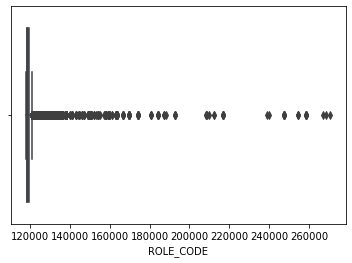

In [11]:
for i in traindf.describe().columns:
    sns.boxplot(traindf[i].dropna())
    plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

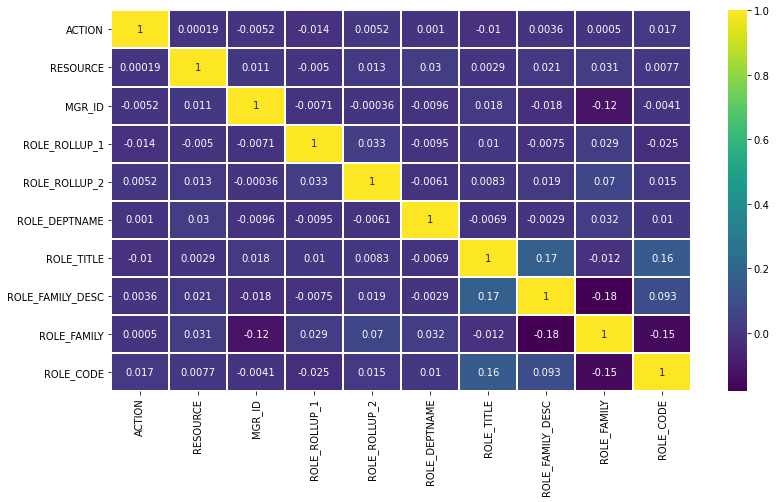

In [12]:
plt.figure(figsize=(13,7))
sns.heatmap(traindf.corr(),annot=True,cmap='viridis',linewidth=1);

## Model Building

In [13]:
y = traindf['ACTION']
X= traindf.drop('ACTION', axis=1)
X_test = testdf.drop('id',axis=1)

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=1) 

In [15]:
from catboost import CatBoostClassifier, Pool

In [16]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose':200,
          'random_seed':1}
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True);

Learning rate set to 0.069882
0:	test: 0.5400959	best: 0.5400959 (0)	total: 206ms	remaining: 3m 25s
200:	test: 0.8016667	best: 0.8017826 (196)	total: 5.2s	remaining: 20.7s
400:	test: 0.8234442	best: 0.8234442 (400)	total: 9.1s	remaining: 13.6s
600:	test: 0.8323016	best: 0.8323806 (596)	total: 12.6s	remaining: 8.36s
800:	test: 0.8358281	best: 0.8361190 (795)	total: 16.7s	remaining: 4.14s
999:	test: 0.8391131	best: 0.8393621 (997)	total: 21.5s	remaining: 0us

bestTest = 0.8393620826
bestIteration = 997

Shrink model to first 998 iterations.
Wall time: 22.1 s


In [17]:
categorical_features = list(range(X.shape[1]))
print(categorical_features)

[0, 1, 2, 3, 4, 5, 6, 7, 8]


In [18]:
%%time

params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'cat_features': categorical_features,
          'verbose':200,
          'random_seed':1}
catmodel_1 = CatBoostClassifier(**params)
catmodel_1.fit(X_train, y_train, eval_set=(X_valid, y_valid), use_best_model=True);

Learning rate set to 0.069882
0:	test: 0.5637606	best: 0.5637606 (0)	total: 126ms	remaining: 2m 6s
200:	test: 0.8955617	best: 0.8955872 (198)	total: 18.9s	remaining: 1m 15s
400:	test: 0.8973364	best: 0.8979162 (365)	total: 37.4s	remaining: 55.9s
600:	test: 0.8972380	best: 0.8979162 (365)	total: 56.7s	remaining: 37.7s
800:	test: 0.8958290	best: 0.8979581 (706)	total: 1m 14s	remaining: 18.6s
999:	test: 0.8933696	best: 0.8979581 (706)	total: 1m 32s	remaining: 0us

bestTest = 0.8979580831
bestIteration = 706

Shrink model to first 707 iterations.
Wall time: 1min 33s


## Cross Validation

In [19]:
from catboost import cv


params = {'loss_function':'Logloss',
          'eval_metric':'AUC',
          'verbose':200,
          'random_seed':1}

total_train_data = Pool(data=X,
                        label=y,
                        cat_features = categorical_features)

scores = cv(pool=total_train_data,
            params=params,
            fold_count = 4,
            seed = 1,
            shuffle = True,
            stratified = True)

0:	test: 0.5381441	best: 0.5381441 (0)	total: 322ms	remaining: 5m 21s
200:	test: 0.8855009	best: 0.8855191 (198)	total: 1m 8s	remaining: 4m 30s
400:	test: 0.8890032	best: 0.8890032 (400)	total: 2m 34s	remaining: 3m 50s
600:	test: 0.8908147	best: 0.8908147 (600)	total: 4m 3s	remaining: 2m 41s
800:	test: 0.8919210	best: 0.8919526 (797)	total: 5m 31s	remaining: 1m 22s
999:	test: 0.8924165	best: 0.8924269 (995)	total: 7m	remaining: 0us


In [20]:
feature_imp = catmodel_1.get_feature_importance(prettified=True)
feature_imp

,Feature Id,Importances
0,RESOURCE,19.158482
1,ROLE_DEPTNAME,16.356596
2,MGR_ID,14.578739
3,ROLE_ROLLUP_2,13.220129
4,ROLE_FAMILY_DESC,9.426130
5,ROLE_TITLE,8.148225
6,ROLE_ROLLUP_1,7.256783
7,ROLE_FAMILY,6.647050
8,ROLE_CODE,5.207866


<IPython.core.display.Javascript object>

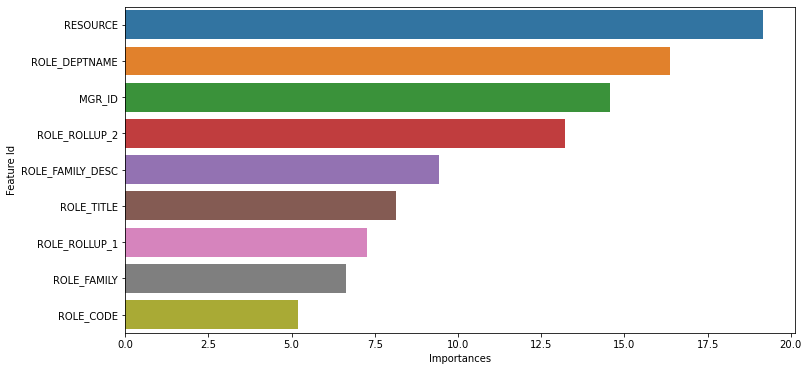

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6));
sns.barplot(x='Importances', y='Feature Id', data=feature_imp)

In [22]:
predictions=catmodel_1.predict_proba(X_test)
predictions

array([[0.28075511, 0.71924489],
       [0.01514176, 0.98485824],
       [0.00540339, 0.99459661],
       ...,
       [0.00674354, 0.99325646],
       [0.05337216, 0.94662784],
       [0.01084122, 0.98915878]])

In [23]:
predictions=catmodel_1.predict(X_test)
print(predictions)

[1 1 1 ... 1 1 1]


In [24]:
catmodel_1.score(X_valid, y_valid)

0.9558159404369584

In [25]:
Predictive_Model = pd.DataFrame({
        "Id": testdf['id'],
        "Action": catmodel_1.predict(X_test)})
Predictive_Model.to_csv('amazon_predict.csv', index=False)

<IPython.core.display.Javascript object>